In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_dataset_2_svm.csv")
data.sample (5)

,Order ID,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
8143,1447144472,1,0,0,1683432,443,16.477326
2652,1447275930,2,3,0,1689033,673,8.000000
7000,1447229274,2,0,0,1652883,581,120.554688
2004,1447282076,2,0,0,1688571,308,1.409438
5678,1447257096,2,3,0,1696074,297,0.355166


In [3]:
# Calculate individual weight for each order
data['Individual Weight'] = data['Weight']/data['Unit quantity']

print(data)

        Order ID  TPT  Ship ahead day count  Ship Late Day count  Product ID  \
0     1447296447    1                     3                    0     1700106   
1     1447158015    1                     3                    0     1700106   
2     1447138899    1                     3                    0     1700106   
3     1447363528    1                     3                    0     1700106   
4     1447363981    1                     3                    0     1700106   
...          ...  ...                   ...                  ...         ...   
9210  1447305023    1                     5                    0     1683388   
9211  1447318797    1                     5                    0     1683388   
9212  1447322252    1                     5                    0     1683388   
9213  1447145319    1                     5                    0     1683430   
9214  1447328131    1                     5                    0     1683424   

      Unit quantity     Weight  Individ

In [4]:
from sklearn.svm import OneClassSVM
# OneClassSVM: Used for anomaly detection by identifying data points outside the "normal" region.

# Create and train the One-Class SVM model
model = OneClassSVM(nu=0.95) 
model.fit(data)

OneClassSVM(nu=0.95)

In [5]:
predictions = model.predict(data)  # Predict anomalies

anomalies = data[predictions == -1]
print(anomalies)

        Order ID  TPT  Ship ahead day count  Ship Late Day count  Product ID  \
1     1447158015    1                     3                    0     1700106   
2     1447138899    1                     3                    0     1700106   
3     1447363528    1                     3                    0     1700106   
4     1447363981    1                     3                    0     1700106   
5     1447351441    1                     3                    0     1700106   
...          ...  ...                   ...                  ...         ...   
9205  1447390638    1                     0                    0     1672707   
9206  1447152946    1                     5                    0     1683424   
9208  1447350451    1                     5                    0     1683424   
9209  1447148659    1                     5                    0     1683388   
9213  1447145319    1                     5                    0     1683430   

      Unit quantity     Weight  Individ

In [6]:
# Count the number of anomalies (outliers)
anomaly_count = len(predictions[predictions == -1])

print(f"Number of anomalies: {anomaly_count}")

Number of anomalies: 5394


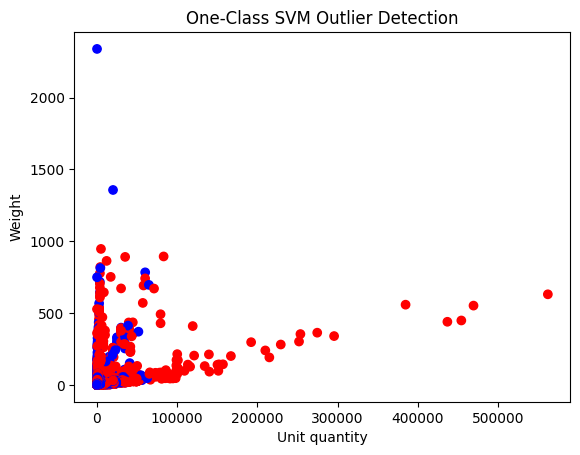

In [7]:
import matplotlib.pyplot as plt

# Define colors for anomalies and inliers
anomaly_color = 'red'
inlier_color = 'blue'

# Create a list of colors based on the predictions
colors = [anomaly_color if prediction == -1 else inlier_color for prediction in predictions]

# Visualize outliers with red and inliers with blue
plt.scatter(data['Unit quantity'], data['Weight'], c=colors)
plt.xlabel('Unit quantity')
plt.ylabel('Weight')
plt.title('One-Class SVM Outlier Detection')
plt.show()

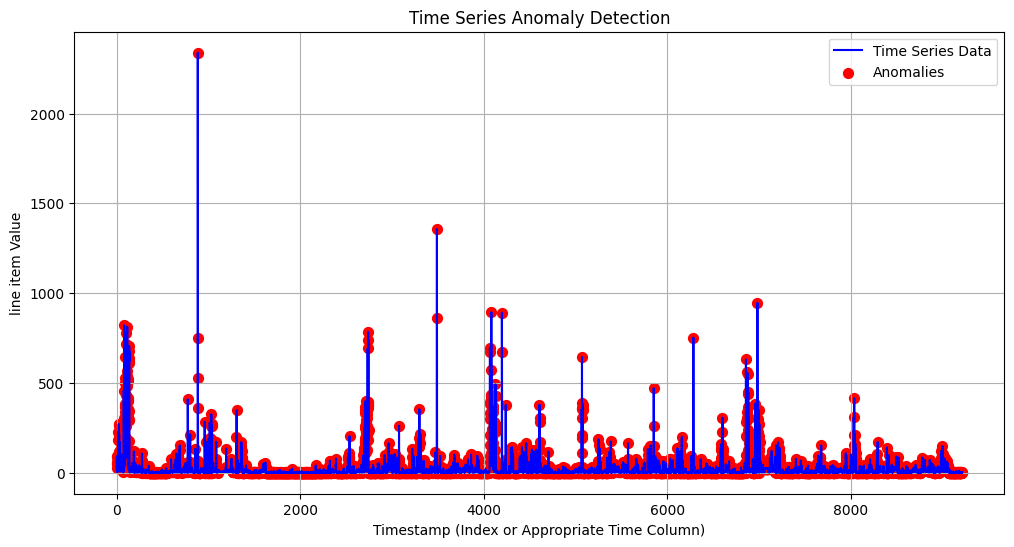

In [8]:
time_series = data['Weight']

# Create a One-Class SVM model with default parameters
svm_model = OneClassSVM()

# Fit the model to the time series data
svm_model.fit(time_series.values.reshape(-1, 1))

# Predict anomalies using the One-Class SVM
anomaly_predictions = svm_model.predict(time_series.values.reshape(-1, 1))

# Create a time series plot with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Time Series Data', color='blue')
plt.scatter(time_series.index[anomaly_predictions == -1], time_series[anomaly_predictions == -1], c='red', label='Anomalies', s=50)
plt.title('Time Series Anomaly Detection')
plt.xlabel('Timestamp (Index or Appropriate Time Column)')
plt.ylabel('line item Value')
plt.legend()
plt.grid(True)
plt.show()

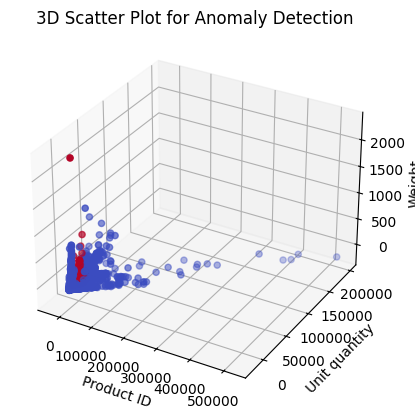

In [9]:
from sklearn.decomposition import PCA

# Select the features for analysis
features = data[['Product ID', 'Unit quantity', 'Weight',"Ship Late Day count"]]  # Include your features

# Create a One-Class SVM model with default parameters
svm_model = OneClassSVM()

# Fit the model to the features
svm_model.fit(features)

# Predict anomalies using the One-Class SVM
anomaly_predictions = svm_model.predict(features)

# Reduce dimensionality using PCA to visualize in 3D
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

# Create a 3D scatter plot with anomalies highlighted
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=anomaly_predictions, cmap='coolwarm')
ax.set_title('3D Scatter Plot for Anomaly Detection')
ax.set_xlabel('Product ID')
ax.set_ylabel('Unit quantity')
ax.set_zlabel('Weight')

plt.show()

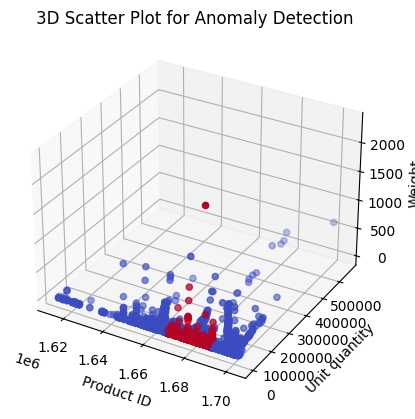

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=anomaly_predictions, cmap='coolwarm')
ax.scatter(features['Product ID'], features['Unit quantity'], features['Weight'], c=anomaly_predictions, cmap='coolwarm')
ax.set_title('3D Scatter Plot for Anomaly Detection')
ax.set_xlabel('Product ID')
ax.set_ylabel('Unit quantity')
ax.set_zlabel('Weight')

plt.show()